# SQL HW09 - Problem 1 (a)
## Amir ElTabakh

In this notebook I connect to my postgreSQL imdb database, and create a histogram of the `averageRating` column in the `xf_title_ratings` table.

In [ ]:
# install psycopg2 in case don't have the library.
# Pandas and Seaborn are also used later in the notebook.
!pip install psycopg2

In [2]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="imdb",
    user="postgres",
    password="6491")

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Executing an MYSQL function using the execute() method
cursor.execute("select version()")

#Setting auto commit false
#conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving data
cursor.execute('''select * from imdb.public.xf_title_basic''')


#Fetching all rows from the table
xf_title_basic = cursor.fetchall();
print(xf_title_basic)

#Commit your changes in the database
conn.commit()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
xf_title_basic[0]

('tt0000843',
 'short',
 'The Death Disc: A Story of the Cromwellian Period',
 'The Death Disc: A Story of the Cromwellian Period',
 False,
 1909,
 None,
 11,
 ['Drama', 'Short'])

In [4]:
# convert list of tuples to a dataframe
import pandas as pd

df = pd.DataFrame(list(xf_title_basic), columns = ['tconst',
                                                     'titleType',
                                                     'primaryTitle',
                                                     'originalTitle',
                                                     "isAdult",
                                                     "startYear",
                                                     "endYear",
                                                     "runtimesMinutes",
                                                     'genres'])

df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimesMinutes,genres
0,tt0000843,short,The Death Disc: A Story of the Cromwellian Period,The Death Disc: A Story of the Cromwellian Period,False,1909.0,NaN,11.0,"[Drama, Short]"
1,tt0000844,short,The Death of Ivan the Terrible,Smert Ioanna Groznogo,False,1909.0,NaN,NaN,"[Drama, History, Short]"
2,tt0000845,short,The Deception,The Deception,False,1909.0,NaN,7.0,"[Drama, Short]"
3,tt0000846,movie,Un día en Xochimilco,Un día en Xochimilco,False,1909.0,NaN,NaN,None
4,tt0000847,short,Don Juan heiratet,Don Juan heiratet,False,1909.0,NaN,10.0,[Short]
...,...,...,...,...,...,...,...,...,...
8783373,tt0000838,movie,A Cultura do Cacau,A Cultura do Cacau,False,1909.0,NaN,NaN,None
8783374,tt0000839,short,The Curse of Money,The Curse of Money,False,1909.0,NaN,NaN,"[Drama, Short]"
8783375,tt0000840,short,The Curtain Pole,The Curtain Pole,False,1909.0,NaN,13.0,"[Comedy, Short]"
8783376,tt0000841,short,The Day After,The Day After,False,1909.0,NaN,8.0,"[Comedy, Short]"


Now we repeat this process, but for `xf_title_ratings` and then we'll use seaborn to generate a histogram of the `averageRating` column.

In [5]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="imdb",
    user="postgres",
    password="6491")

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Executing an MYSQL function using the execute() method
cursor.execute("select version()")

#Setting auto commit false
#conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving data
cursor.execute('''select * from imdb.public.xf_title_ratings''')

#Fetching all rows from the table
xf_title_ratings = cursor.fetchall();

#Commit your changes in the database
conn.commit()

xf_title_ratings = pd.DataFrame(list(xf_title_ratings), columns = ['tconst',
                                                     'averageRating',
                                                     'numVotes'])

xf_title_ratings

,tconst,averageRating,numVotes
0,tt0264273,7.8,50
1,tt0264275,8.2,132
2,tt0264279,3.5,43
3,tt0264280,6.1,9
4,tt0264281,6.8,47
...,...,...,...
1226091,tt0264268,7.6,39
1226092,tt0264269,6.7,60
1226093,tt0264270,6.3,188
1226094,tt0264271,7.7,11


<AxesSubplot:xlabel='averageRating', ylabel='Count'>

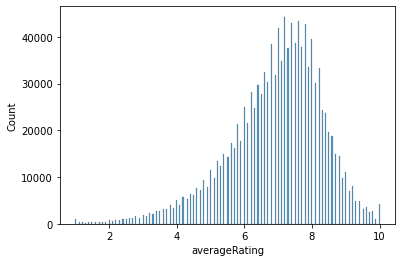

In [6]:
import seaborn as sns

sns.histplot(xf_title_ratings['averageRating'])